<a href="https://colab.research.google.com/github/joaomr7/portfolio-data-science/blob/main/Analisando_os_Dados_do_Airbnb_Sidney_Austr%C3%A1lia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Sydney*

---

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Sydney na Austrália, e ver quais insights podem ser extraídos a partir de dados brutos.**

 &nbsp;

# Cidade Sydney
---

Sydney é **maior cidade da Austrália**, além de a mais **cara e populosa**, estando localizada no estado de Nova Gales do Sul. A cidade **abriga um dos maiores portos naturais do mundo**, o Port Jackson também conhecido como Sydeny Harbour(Porto de Sydney), onde se encontra o Sydney Opera House e o Sydney Harbour Bridge uns dos pontos mais conhecidos da cidade.

<center><img src="https://drive.google.com/uc?export=view&id=1oqSawZ3azbJDwafC-eaCF9mgq-FoKOdA" align="center" height="400"/></center>

 &nbsp;

**Dicionário:**
  * **Insight:** obter uma compreensão de algo.

## Obtenção dos Dados


Os dados usados neste notebook forma obtidos no site [Inside Airbnb](http://insideairbnb.com/get-the-data/).
Para fazer a análise está sendo usado o arquivo:
  * `listings.csv` - *Summary information and metrics for listings in Sydney (good for visualisations).*

**Observação: o site pode eventualmente atualizar os dados, então as informações aqui podem estar datadas.**

In [58]:
# instalar pacote necessário
!pip install -U kaleido

In [59]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Image

In [60]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/australia/nsw/sydney/2023-06-06/visualisations/listings.csv',
                 index_col = 'id', parse_dates=['last_review'])

## Análise dos Dados


Começamos entendendo melhor os dados antes de qualquer análise para que saibamos com que tipo de dados estamos lidando. Isso nos permitirá termos alguma ideia do que podemos fazer com o conjunto de dados.

**Dicionário das variáveis**

* **id -** identificador único para o imóvel
* **name -** nome da propriedade
* **host_id -** identificador único do proprietário
* **host_name -** nome do proprietário
* **neighbourhood_group -** esta coluna não contém nenhum valor válido
* **neighbourhood -** nome do bairro
* **latitude -** coordenada latitudinal da propriedade
* **longitude -** coordenada longitudinal da propriedade
* **room_type -** tipo de quarto oferecido
* **price -** preço diário na moeda local(no caso o dólar australiano, A\$)
* **minimum_nights -** quantidade mínima de noites para reservar
* **number_of_reviews -** número de avaliações da propriedade
* **last_review -** data do último review
* **reviews_per_month -** quantidade de reviews por mês
* **calculated_host_listings_count -** quantidade de imóveis do mesmo proprietário
* **availability_365 -** número de dias de disponibilidade dentro de 365 dias
* **number_of_reviews_ltm -** número de reviews nos últimos 12 meses
* **license -** licença ou número de registro

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [61]:
# mostrar as 5 primeiras entradas
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
4688422,Rental unit in Manly · ★4.71 · 2 bedrooms · 3 ...,13396297,Anne,NaN,Manly,-33.805600,151.28433,Entire home/apt,300,1,36,2023-01-28,0.35,1,31,13,PID-STRA-26284
39681254,Rental unit in Manly · ★5.0 · 1 bedroom · 1 be...,25316226,Joel,NaN,Manly,-33.805120,151.28907,Entire home/apt,110,90,3,2019-12-12,0.07,1,0,0,NaN
22314790,Rental unit in Manly · 1 bedroom · 2 beds · 1 ...,48897764,Simon,NaN,Manly,-33.796270,151.28476,Entire home/apt,190,90,1,2018-01-06,0.02,1,0,0,NaN
39446599,Guesthouse in Eastwood · 1 bedroom · 1 bed · 1...,152329169,Ebrahim,NaN,Ryde,-33.785970,151.09255,Entire home/apt,70,90,0,NaT,NaN,1,0,0,PID-STRA-26166
43629106,Rental unit in Manly · ★5.0 · 2 bedrooms · 4 b...,348372472,Jo,NaN,Manly,-33.791103,151.28688,Entire home/apt,742,2,27,2023-03-25,0.85,1,282,10,PID-STRA-10013


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Queremos identificar características básicas de nosso conjunto de dados como quantidade de entradas, quantidade de variáveis e o tipo de cada uma, assim, conseguimos ter melhor compreensão dos dados.

In [62]:
# identificar o volume de dados do DataFrame
print('Quantidade de entradas: \t{}'.format(df.shape[0]))
print('Quantidade de variáveis:\t{}\n'.format(df.shape[1]))

# verificar os tipos das variáveis
display(df.dtypes)

Quantidade de entradas: 	23451
Quantidade de variáveis:	17



name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                      float64
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                   object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Nesta etapa buscamos verificar se há valores faltantes nos dados, dessa forma verificando sua integridade e vendo se não há valores importantes faltando.


In [63]:
# ordenar em ordem decrescente as porcentagens de variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.526630
reviews_per_month                 0.251460
last_review                       0.251460
host_name                         0.000085
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
name                              0.000000
minimum_nights                    0.000000
host_id                           0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
price                             0.000000
dtype: float64

Percebemos o seguinte:
  * **`neighbourhood_group`** não possui nenhum valor válido
  * **`license`** possui por volta de 52% dos valores ausentes
  * **`reviews_per_month`** possui por volta de 25% dos valores ausentes
  * **`last_review`** possui por volta de 25% dos valores ausentes
  * **`host_name`** não chega a 1% de valores ausentes

Como a variável `neighbourhood_group` não possui valores válidos, iremos remover esta coluna por completo. Já as outras variáveis, como não possuem informações que interessam para o escopo desta análise, também iremos removê-las. E seguindo essa lógica de valores que não nos interessam, aproveitamos para remover outras variáveis como `number_of_reviews` e `number_of_reviews_ltm`, pois não são muito informativas sem o acesso ao conteúdo das reviews.

E pensando em boas práticas, vamos fazer essas modificações em uma nova variável nomeada `df_clean` para não afetarmos o conjunto original.

In [64]:
# remover colunas do conjunto de dados
df_clean = df.copy()
df_clean.drop(['neighbourhood_group',
         'license',
         'reviews_per_month',
         'last_review',
         'host_name',
         'number_of_reviews',
         'number_of_reviews_ltm'],
        axis=1, inplace=True)

### **Q3. Qual o tipo de distribuição das variáveis?**

Agora plotamos os histogramas das variávies para visualizar suas distribuições e podermos levantar alguma suspeita de valores `outliers` nos dados.


**Dicionário:**

  * **Outlier:** valor que se diferencia demais dos demais valores.

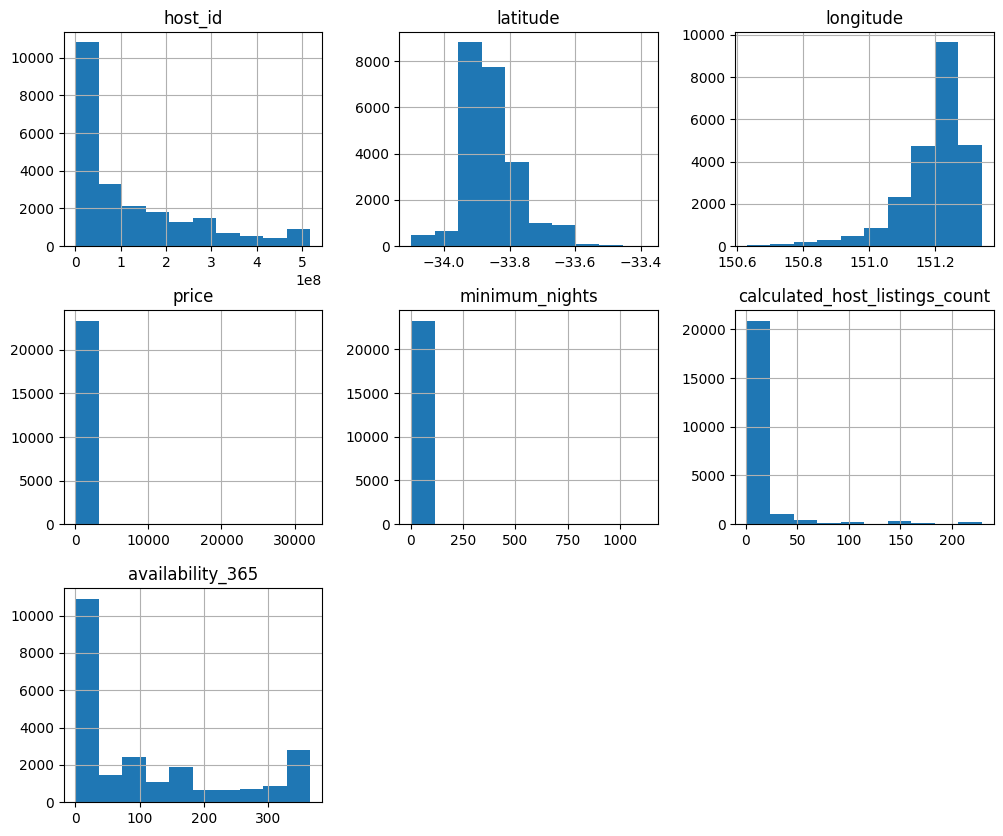

In [65]:
# plotar o histograma das variáveis numéricas
df_clean.hist(figsize=(12, 10));

#### Lidando com `outliers`
Olhando para as distribuições acima conseguimos supeitar que existem alguns valores outliers nas variáveis `price` e `minimum_nights`. Com isso em mente, podemos fazer uma análise de suas propriedades estatísticas para comerçarmos a tratar esses valores.

In [66]:
# Mostrar descrição estatística das variáveis 'price' e 'minimum_nights'
df_clean[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,23451.000000,23451.000000
mean,289.477549,48.506759
std,556.278930,53.000527
min,16.000000,1.000000
25%,99.000000,2.000000
50%,170.000000,30.000000
75%,299.000000,90.000000
max,32133.000000,1125.000000


Temos as seguintes observações:

  * A variável `price` possui uma média próximo ao terceiro quartil(75%) oque é um indicativo de outlier, sem falar que a diferença entre o terceiro quartil e o valor máximo é muito grande.

  * Em relação à variável `minimum_nights`, a diferença entre o terceiro quartil e o valor máximo também é muito grande, por isso que o histograma dessa variável não está muito informativo.

Para lidar com os outliers usaremos a regra do **IQR Score**, dessa forma conseguimos detectar os outliers. Lembrando que o  IQR é calculado subtraindo o terceiro quartil(75%) do primeiro quartil(25%).


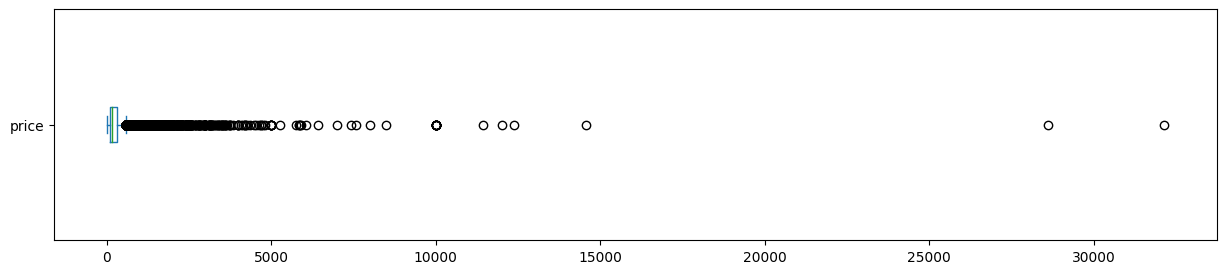

IQR da variável price: 200.0

Limite superior de price: A$ 599.00
Limite inferior de price: A$ -201.00

2228 valores acima de A$ 599.00
Corresponde a 9.50% dos dados


In [67]:
# plotar boxplot da variável 'price'
df_clean.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# identificando os outliers da variável 'price'
price_Q1, price_Q3 = df_clean.price.quantile([.25, .75])
price_IQR = price_Q3 - price_Q1
print('IQR da variável price:', price_IQR)

# calculando os limites
price_higher = price_Q3 + 1.5 * price_IQR
price_lower = price_Q1 - 1.5 * price_IQR
print('\nLimite superior de price: A$ {:.2f}'.format(price_higher))
print('Limite inferior de price: A$ {:.2f}'.format(price_lower))

# calcular quantidade de preços acima do limite superior
print('\n{} valores acima de A$ {:.2f}'.format((df_clean.price > price_higher).sum(), price_higher))
print('Corresponde a {:.2f}% dos dados'.format((df_clean.price > price_higher).sum() / df_clean.shape[0] * 100))

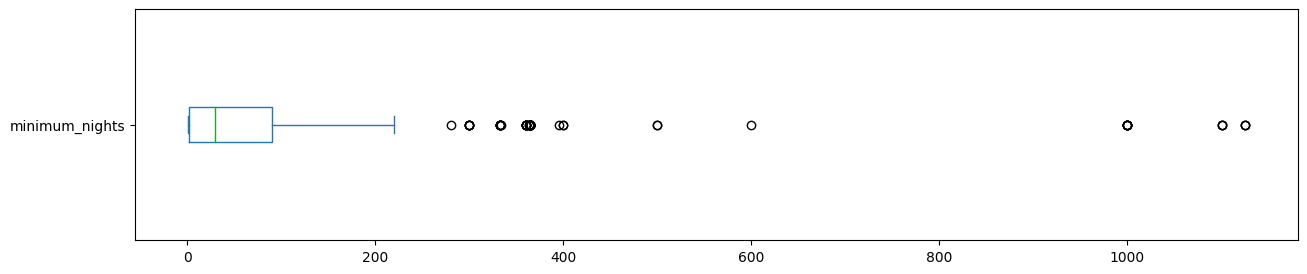

IQR da variável price: 88.0

Limite superior de minimum_nights: 222.0
Limite inferior de minimum_nights: -130.0

93 valores acima de 222.0 noites mínimas
Corresponde a 0.40% dos dados


In [68]:
# plotar boxplot da variável 'minimum_nights'
df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# identificando os outliers da variável 'minimum_nights'
nights_Q1, nights_Q3 = df_clean.minimum_nights.quantile([.25, .75])
nights_IQR = nights_Q3 - nights_Q1
print('IQR da variável price:', nights_IQR)

# calculando os limites
nights_higher = nights_Q3 + 1.5 * nights_IQR
nights_lower = nights_Q1 - 1.5 * nights_IQR
print('\nLimite superior de minimum_nights:', nights_higher)
print('Limite inferior de minimum_nights:', nights_lower)

# calcular quantidade de noites mínimas acima do limite superior
print('\n{} valores acima de {} noites mínimas'.format((df_clean.minimum_nights > nights_higher).sum(), nights_higher))
print('Corresponde a {:.2f}% dos dados'.format((df_clean.minimum_nights > nights_higher).sum() / df_clean.shape[0] * 100))

Na análise conseguimos detectar o seguinte:
  * Os outliers da variável `price` correspondem a 9.5% dos dados totais
  * Os outliers da variável `minimum_nights` correpondem a 0.4% dos dados totais

Considerando que temos 23451 exemplos no conjunto de dados, remover esses outliers não irá causar um impacto tão grande em nossa análise, portanto podemos considerar uma boa troca remover os outlier ao custo de perder em torno de 10% dos dados.

In [69]:
# armazenar a quantidade de exemplos antes da limpeza
examples_before_clean = df_clean.shape[0]

# remover os outliers
df_clean.drop(df_clean[df_clean.price > price_higher].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > nights_higher].index, axis=0, inplace=True)

# mostar a diferença da quantidade de exemplos
print('Quantidade de exemplos antes:', examples_before_clean)
print('Quantidade de exemplos agora:', df_clean.shape[0])
print('{:.2f}% dos exemplos removidos'.format(100 - (df_clean.shape[0] / examples_before_clean * 100)))

Quantidade de exemplos antes: 23451
Quantidade de exemplos agora: 21141
9.85% dos exemplos removidos


Agora vamos plotar novamente os histogramas e os boxplots para visualizar o resultando de nossa limpeza.

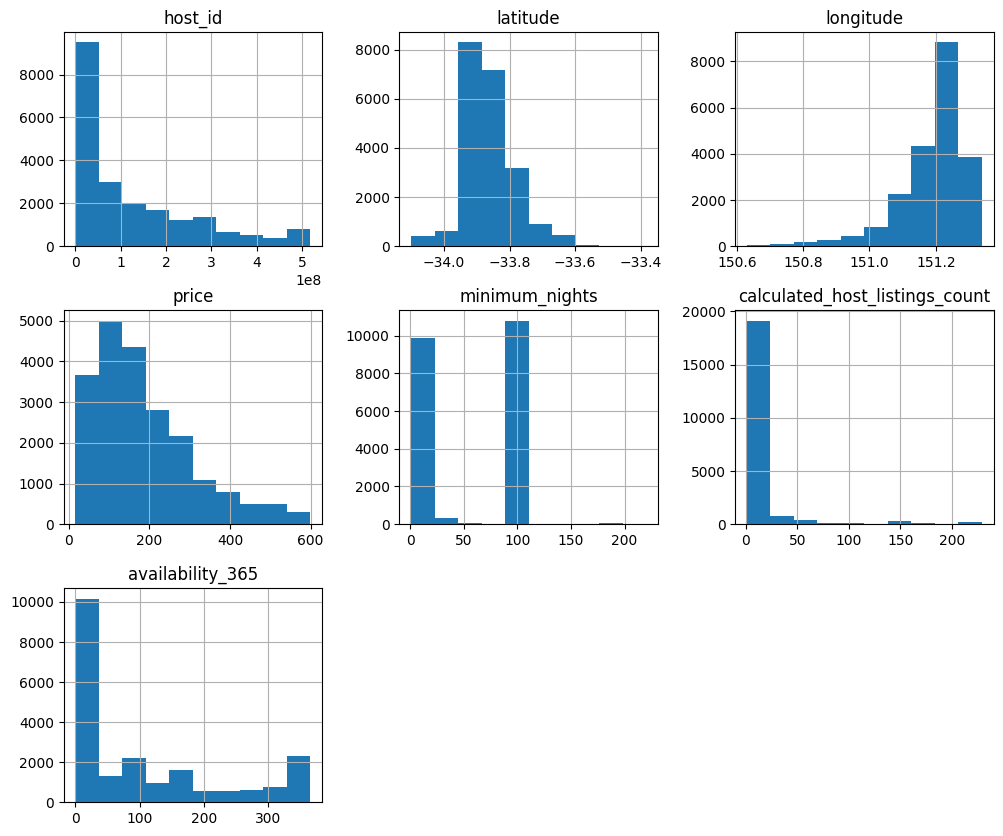

In [70]:
# plotar o histograma das variáveis numéricas
df_clean.hist(figsize=(12, 10))
plt.show()

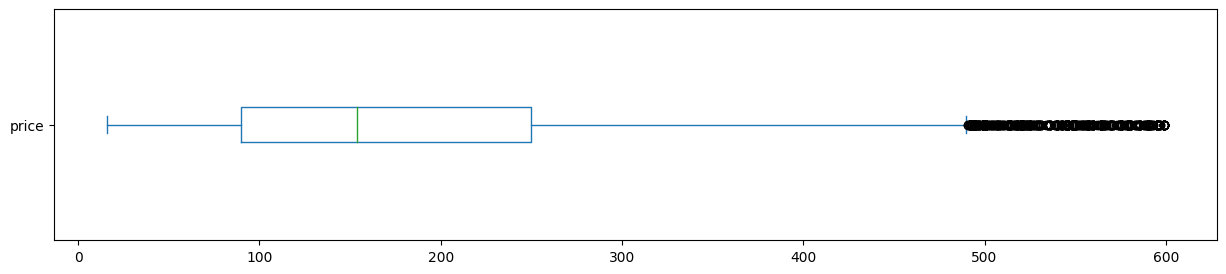

In [71]:
# plotar o boxplot da variável 'price'
df_clean.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

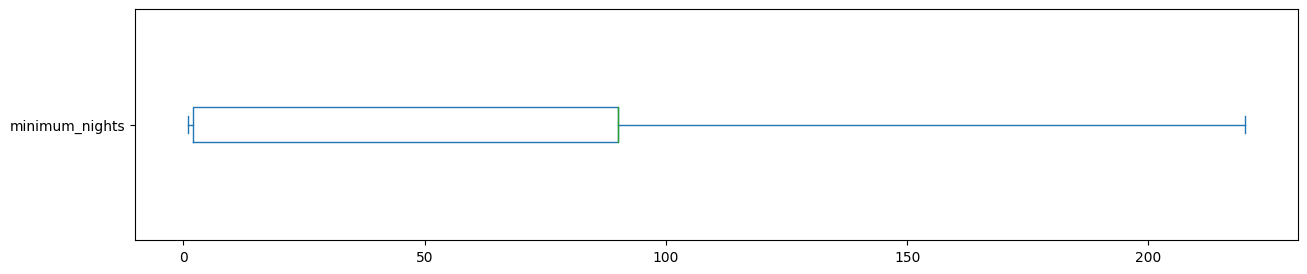

In [72]:
# plotar o boxplot da variável 'minimum_nights'
df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

Conseguimos notar pelos gráficos que agora as variáveis `price` e `minimum_nights` estão mais claras de visualizar, pois não há mais valores outliers afetando drasticamente as suas visualizações.

### **Q4. Qual a média dos preços de aluguel?**

A média de preços dos aluguéis é de A\$ 184,93. Essa média agora é mais confiável sem a presença de outliers, visto que antes a média se aproximava do terceiro quartil(75%) e agora se aproxima mais da mediana(50%) como é possível ver abaixo.

In [73]:
# ver a descrição estatística de `price`
df_clean.price.describe()

count    21141.000000
mean       184.935150
std        121.618754
min         16.000000
25%         90.000000
50%        154.000000
75%        250.000000
max        599.000000
Name: price, dtype: float64

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Agora queremos saber qual o tipo de imóvel mais alugado em Sydney no Airbnb. Os tipos disponíveis são `Entire home/apt`, `Private room`, `Shared room` e `Hotel room`.

Apartir das quantidades de cada tipo, conseguimos extrair as seguintes informações:
  * **Entire home/apt -** corresponde a 60.56% dos tipos de imóveis.
  * **Private room -** corresponde a 28.02% dos tipos de imóveis.
  * **Shared room -** corresponde a 1.15% dos tipos de imóveis.
  * **Hotel room -** corresponde a 0.40% dos tipos de imóveis.

Os tipos de imóveis em maior quantidade são `Entire home/apt` seguido de `Private room`.

In [74]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    14202
Private room        6573
Shared room          270
Hotel room            96
Name: room_type, dtype: int64

In [75]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df.shape[0]

Entire home/apt    0.605603
Private room       0.280287
Shared room        0.011513
Hotel room         0.004094
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



Nessa etapa buscamos identificar a localidade mais cara de Sydney baseado nos dados disponibilizados pelo conjunto de dados.

In [76]:
# ver a descrição estatística dos 20 maiores preços por bairros, ordenados pela média
df_clean.groupby(by=['neighbourhood']).price.describe().sort_values(by=['mean'], ascending=False)[:20]

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Pittwater,574.0,283.792683,133.772334,26.0,179.25,268.0,380.00,590.0
Manly,921.0,252.042345,135.609740,20.0,150.00,220.0,340.00,599.0
Mosman,241.0,244.605809,134.855409,36.0,145.00,202.0,328.00,599.0
Warringah,1013.0,224.608095,136.666856,25.0,115.00,192.0,300.00,599.0
Sutherland Shire,415.0,218.573494,132.282083,34.0,121.00,180.0,295.00,597.0
Woollahra,742.0,211.001348,131.793212,25.0,100.00,180.0,300.00,597.0
North Sydney,816.0,204.819853,120.884504,19.0,119.75,179.5,260.00,595.0
Waverley,2633.0,201.491075,124.469122,22.0,100.00,179.0,262.00,599.0
Leichhardt,521.0,200.616123,116.760004,32.0,110.00,171.0,270.00,599.0


Como é possível ver acima as 10 localidade mais caras são `Pittwater`, `Manly`, `Mosman`, `Warringah`, `Sutherland Shire`, `Woollahra`, `North Sydney`, `Waverley`, `Leichhardt` e `Hunters Hill`. Porém `Hunters Hill` possui apenas 31 exemplos, por isso iremos considerar `Sydney` ao invés de `Hunters Hill`, pois possui 4914 exemplos, portanto é mais confiável.

Agora vamos plotar essas 10 localidades em um mapa para ver se conseguimos obter algum insight.

In [77]:
# função para criar um mapa com as localidades dadas
def create_map_image(df, locales):
  # pegar as coordenadas das localidades mais fornecidas
  coordinates = df.loc[:, ['neighbourhood', 'price', 'latitude', 'longitude']].copy()
  coordinates = coordinates[coordinates.neighbourhood.isin(locales)]

  # criar um mapa com as coordenadas
  map = px.scatter_mapbox(coordinates,
                        lat='latitude',
                        lon='longitude',
                        hover_name='neighbourhood',
                        hover_data=['price'],
                        color='neighbourhood',
                        size='price',
                        size_max=10,
                        zoom=8,
                        mapbox_style="stamen-terrain")

  # retornar o mapa como imagem
  return map.to_image(format='png')

Vizinhanças mais caras


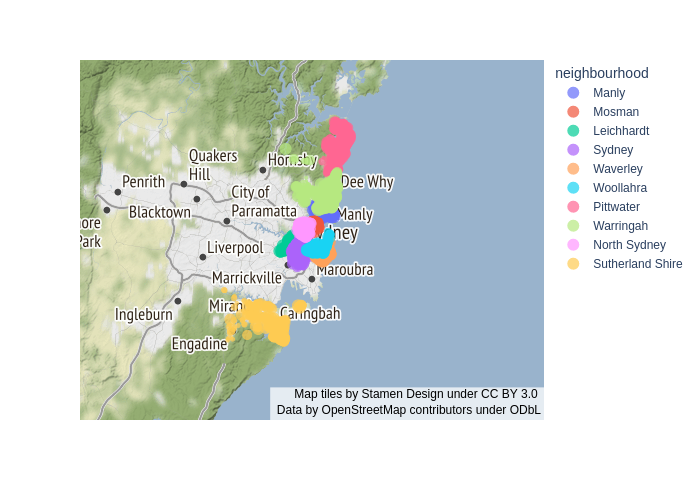

In [78]:
# criar uma lista com o nome das 10 vizinhanças mais caras
neighbourhoods = ['Pittwater',
                  'Manly',
                  'Mosman',
                  'Warringah',
                  'Sutherland Shire',
                  'Woollahra',
                  'North Sydney',
                  'Waverley',
                  'Leichhardt',
                  'Sydney']

# mostar o mapa
print('Vizinhanças mais caras')
map_image = create_map_image(df_clean, neighbourhoods)
Image(map_image)

De maneira geral, nota-se que as localidades mais caras concentram-se na região central da cidade de Sydney, próximas à costa, como é possível observar no mapa acima, com valores indo de uma média de A\$ 185,42 a A\$ 283,79.

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

É possível notar que há dois estremos entre mínimo de noites para aluguel, em um extremo os alugueis são para um mínimo entre 1 e 10 noites, e no outro, entre 80 e 90 noites.

In [79]:
# ver a descrição estatística da coluna `minimum_nights`
display(df_clean.minimum_nights.describe())

count    21141.000000
mean        48.698169
std         43.745409
min          1.000000
25%          2.000000
50%         90.000000
75%         90.000000
max        220.000000
Name: minimum_nights, dtype: float64

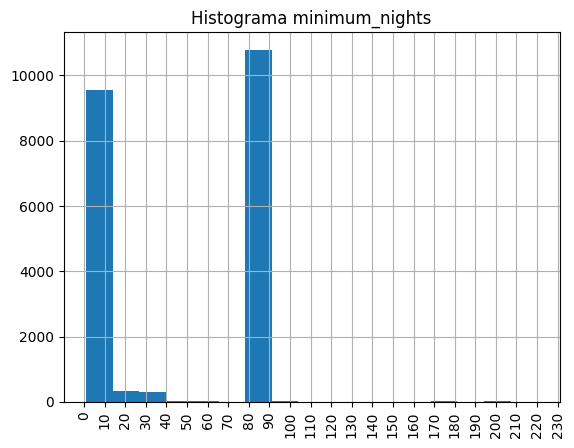

In [80]:
# histograma da coluna minimum_nights
df_clean.minimum_nights.hist(bins=17)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(25))
plt.xticks(rotation=90)
plt.title('Histograma minimum_nights')
plt.show()

## Conclusões


Após realizar uma análise nos dados do Airbnb para a cidade de Sydney na Austrália, consegui extarir algumas informações importantes.

* Primerio observei que para alugar um imóvel em Sydney deve-se pagar por noite uma média de A\$ 184,93, que convertendo para o real(que no momento da análise está valendo 0,31 dólares australianos), daria um valor de R\$ 601,95.

* Em seguida observei que há uma grande oferta de `Entire home/apt` e `Private room`, que segundo o site da [Airbnb](https://www.airbnb.com/help/article/5), este é um lugar inteiro, com quarto, banheiro e cozinha e aquele um quarto privado.

* Também percebi que as regiões mais caras ficam ao centro da cidade próximas à costa, com valores indo de uma média de A\$ 185,42 a A\$ 283,79.

* E por fim observei que, em geral, o mínimo de noites para alugar um imóvel é entre 1 e 10 noites ou entre 80 e 90 noites.

Portanto, Sydney pode ser uma cidade bem cara para os brasileiros desenjando passar uma férias por lá, pois dependendo do lugar em que decidirem se hospedar, podem ter que desenbolçar entre A\$ 185,42 e A\$ 283,79(R\$ 603,54 e R\$ 923,73) por noite, sem contar com os demais gastos.